In [1]:
import pandas as pd
names=['l','s','n','w','t']

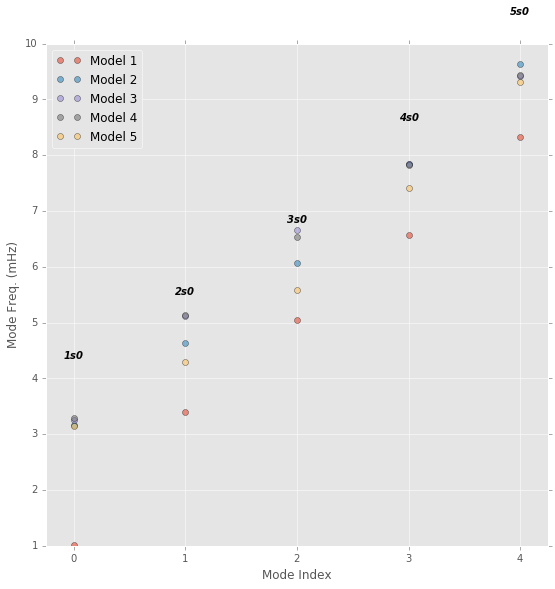

In [2]:
from matplotlib import pylab as plt
plt.style.use('ggplot')

fig = plt.figure(1,(9,9))


for ii, each in enumerate([1,2,3,4,5]):

    df = pd.read_csv('sharp/Model%swDiscontinuities.modes' % each, delim_whitespace=True, names=names)

    plt.plot(df.w,'o', alpha=0.6, label='Model %d' % each)

for ii, row in df.iterrows():
    #print(row)
    string = str(row.l) + str(row.s) + str(row.n)
    plt.text(ii, df.w.tolist()[ii]+1.2, string, style='italic', fontweight='bold', ha='center')
    
plt.legend(fancybox=True, loc='best')
plt.ylabel('Mode Freq. (mHz)')
plt.xlabel('Mode Index')
plt.xlim(-0.25,4.25)
#plt.ylim(2,11)
plt.show()
#plt.savefig('mode_plot.png')

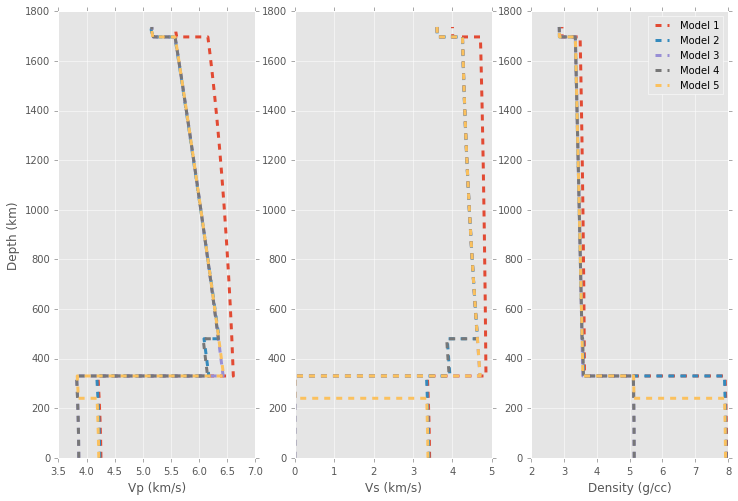

In [3]:
def plot_profile(model_no):
    names = ['Radius',"Density",'Vp',"Vs","_","__","___","____","_____"]
    df = pd.read_csv('sharp/Model%swDiscontinuities.txt' % model_no, skiprows=3, names=names, delim_whitespace=True, header=None)

    df.Radius = df.Radius / 1000.
    df.Vs = df.Vs /1000.
    df.Vp = df.Vp /1000.
    df.Density = df.Density / 1000.
    
    
    plt.subplot(1,3,2)
    plt.plot(df.Vs,df.Radius, '--', label = 'Model %d' % model_no, lw = 3)
    plt.subplot(1,3,1)
    plt.plot(df.Vp,df.Radius, '--', label = 'Model %d' % model_no, lw = 3)
    plt.subplot(1,3,3)
    plt.plot(df.Density,df.Radius, '--', label = 'Model %d' % model_no, lw = 3)
    
    
    return

fig = plt.figure(1,(12,8))

for model_no in range(1,6):
    plot_profile(model_no)
    
plt.legend(loc='best', fontsize=10)

plt.subplot(1,3,2)
plt.xlabel('Vs (km/s)')
plt.subplot(1,3,1)
plt.xlabel('Vp (km/s)')
plt.ylabel('Depth (km)')
plt.subplot(1,3,3)
plt.xlabel('Density (g/cc)')
    
plt.show()



